# Working File - Alanis Perez

In [46]:
# Imports
import pandas as pd
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [4]:
# Read in file
house_df = pd.read_csv("Data/house_sales.csv")
house_df

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3.0,1.00,1180.0,5650.0,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3.0,2.25,2570.0,7242.0,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2.0,1.00,770.0,10000.0,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4.0,3.00,1960.0,5000.0,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3.0,2.00,1680.0,8080.0,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,263000018,20140521T000000,360000.0,3.0,2.50,1530.0,1131.0,3.0,0,0,...,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509
21609,6600060120,20150223T000000,400000.0,4.0,2.50,2310.0,5813.0,2.0,0,0,...,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200
21610,1523300141,20140623T000000,402101.0,2.0,0.75,1020.0,1350.0,2.0,0,0,...,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007
21611,291310100,20150116T000000,400000.0,3.0,2.50,1600.0,2388.0,2.0,0,0,...,8,1600,0,2004,0,98027,47.5345,-122.069,1410,1287


In [6]:
house_df.isnull().sum()

id                  0
date                0
price               0
bedrooms         1134
bathrooms        1068
sqft_living      1110
sqft_lot         1044
floors              0
waterfront          0
view                0
condition           0
grade               0
sqft_above          0
sqft_basement       0
yr_built            0
yr_renovated        0
zipcode             0
lat                 0
long                0
sqft_living15       0
sqft_lot15          0
dtype: int64

In [ ]:
# drop missing sqft_lot

In [98]:
# Drop bedrooms (0, 8, 9, 10, 33)
house_clean = house_df.drop(house_df[house_df['bedrooms'].isin([0, 8, 9, 10, 33])].index)
house_clean

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3.0,1.00,1180.0,5650.0,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3.0,2.25,2570.0,7242.0,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2.0,1.00,770.0,10000.0,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4.0,3.00,1960.0,5000.0,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3.0,2.00,1680.0,8080.0,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,263000018,20140521T000000,360000.0,3.0,2.50,1530.0,1131.0,3.0,0,0,...,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509
21609,6600060120,20150223T000000,400000.0,4.0,2.50,2310.0,5813.0,2.0,0,0,...,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200
21610,1523300141,20140623T000000,402101.0,2.0,0.75,1020.0,1350.0,2.0,0,0,...,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007
21611,291310100,20150116T000000,400000.0,3.0,2.50,1600.0,2388.0,2.0,0,0,...,8,1600,0,2004,0,98027,47.5345,-122.069,1410,1287


In [100]:
house_clean['bathrooms'].unique()

array([1.  , 2.25, 3.  , 2.  , 4.5 , 1.5 , 2.5 , 1.75, 2.75,  nan, 3.25,
       4.  , 3.5 , 0.75, 4.75, 5.  , 4.25, 3.75, 0.  , 5.25, 6.  , 1.25,
       0.5 , 5.5 , 5.75, 8.  , 6.75, 7.75, 6.25, 6.5 ])

<Axes: ylabel='bathrooms'>

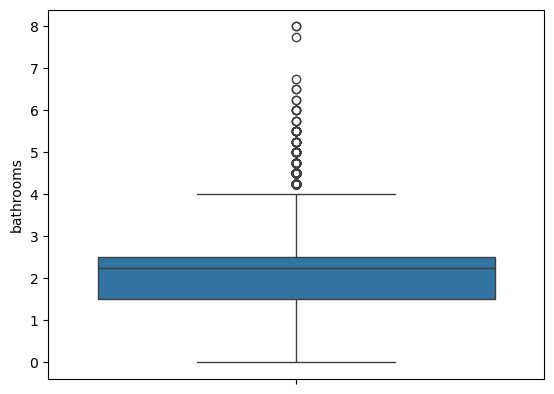

In [102]:
sns.boxplot(house_clean['bathrooms'])

In [116]:
# drop greater than 4 bathrooms
bighouses = house_clean[house_clean['bathrooms'] > 4]
bighouses

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
5,7237550310,20140512T000000,1225000.0,4.0,4.50,5420.0,101930.0,1.0,0,0,...,11,3890,1530,2001,0,98053,47.6561,-122.005,4760,101930
270,4054500390,20141007T000000,1365000.0,4.0,4.75,5310.0,57346.0,2.0,0,0,...,11,5310,0,1989,0,98077,47.7285,-122.042,4180,47443
300,3225069065,20140624T000000,3075000.0,4.0,5.00,4550.0,18641.0,1.0,1,4,...,10,2600,1950,2002,0,98074,47.6053,-122.077,4550,19508
419,8678500060,20140710T000000,1550000.0,5.0,4.25,6070.0,171626.0,2.0,0,0,...,12,6070,0,1999,0,98024,47.5954,-121.950,4680,211267
450,4055700030,20150502T000000,1450000.0,3.0,4.50,3970.0,24920.0,2.0,0,2,...,10,3260,710,1977,1999,98034,47.7183,-122.258,2610,13838
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21494,2413910120,20140702T000000,915000.0,3.0,4.50,3850.0,62726.0,2.0,0,0,...,10,3120,730,2013,0,98053,47.6735,-122.058,2630,46609
21501,4233600150,20150203T000000,1150000.0,5.0,4.25,4010.0,8252.0,2.0,0,0,...,10,4010,0,2015,0,98075,47.5974,-122.013,3370,8252
21506,2524069097,20140509T000000,2238890.0,5.0,6.50,7270.0,130017.0,2.0,0,0,...,12,6420,850,2010,0,98027,47.5371,-121.982,1800,44890
21551,1561750040,20141224T000000,1375000.0,5.0,4.50,4350.0,13405.0,2.0,0,0,...,11,4350,0,2014,0,98074,47.6018,-122.060,3990,7208


In [ ]:
# sqft_living = basement + above
# bedroom = based on sqft_living (above 8600; take range from sqft_living)
# bathroom = based on sqft (take range from sqft_living)

# drop bedrooms == 0, 8, 9, 10, 33


# check if any values have 0 where they shouldn't, do a cpl box plots to check for outliers

In [ ]:
# Transform data appropriately using techniques such as aggregation, normalization, and feature construction
# Reduce redundant data and perform need-based discretization